In [1]:

import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import re
import seaborn as sns

## Data Cleaning

In [2]:
# functions lat/lon converters from Degree Minutes Seconds to Decimal

def londms2dec(lon: str):
    deg, minutes, seconds,_,_=  re.split('[°′]', lon)
    seconds = seconds[:-2]
    return (float(deg) + float(minutes)/60 + float(seconds)/(60*60)) * (-1)
def latdms2dec(lat: str):
    deg, minutes, seconds,_,_ =  re.split('[°′]', lat)
    seconds = seconds[:-2]
    return (float(deg) + float(minutes)/60 + float(seconds)/(60*60))


In [3]:
data = pd.read_excel("Villagomez2011-tabla5.xlsx")

In [4]:
data.head()

,Samples,Unit,Lithology,Latitude N,Longitude W,SiO 2,TiO 2,Al 2O 3,Fe 2 O3,MnO,...,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu
0,DV38,Volcanic\nFm.,Diabase,3°46′23.6′′,76°44′23.9′′,47.07,1.27,15.28,11.48,0.20,...,1.96,0.97,3.08,0.64,4.10,0.85,2.55,0.43,2.38,0.42
1,DV39,Volcanic\nFm.,Gabbro,3°27′48.3′′,76°35′13.5′′,49.89,1.47,12.99,13.91,0.20,...,3.06,1.02,3.30,0.86,5.58,1.25,3.36,0.51,3.90,0.51
2,DV40,Volcanic\nFm.,Dolerite,3°28′40.9′′,76°38′47.7′′,50.16,1.08,13.82,11.87,0.19,...,2.51,0.73,2.55,0.55,3.67,0.65,2.44,0.61,2.04,0.27
3,DV74,Volcanic Fm.\n(Barroso Fm.),Basalt,6°00′07.0′′,75°47′34.2′′,49.15,0.96,14.28,10.85,0.34,...,1.51,0.62,2.24,0.38,3.26,0.67,1.91,0.29,1.98,0.29
4,DV75,Volcanic Fm.\n(Barroso Fm.),Basalt,5°53′43.4′′,75°54′05.8′′,50.12,0.97,13.81,10.27,0.18,...,1.82,0.64,1.89,0.43,2.85,0.61,1.74,0.22,1.93,0.30


In [5]:
data['Latitude N'] = pd.Series(data['Latitude N'], dtype="string")
data['Longitude W'] = pd.Series(data['Longitude W'], dtype="string")

In [6]:
data["Latitude N"] = data["Latitude N"].apply(latdms2dec)

In [7]:
data["Longitude W"] = data["Longitude W"].apply(londms2dec)


In [8]:
data.head()

,Samples,Unit,Lithology,Latitude N,Longitude W,SiO 2,TiO 2,Al 2O 3,Fe 2 O3,MnO,...,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu
0,DV38,Volcanic\nFm.,Diabase,3.773056,-76.739722,47.07,1.27,15.28,11.48,0.20,...,1.96,0.97,3.08,0.64,4.10,0.85,2.55,0.43,2.38,0.42
1,DV39,Volcanic\nFm.,Gabbro,3.463333,-76.586944,49.89,1.47,12.99,13.91,0.20,...,3.06,1.02,3.30,0.86,5.58,1.25,3.36,0.51,3.90,0.51
2,DV40,Volcanic\nFm.,Dolerite,3.477778,-76.646389,50.16,1.08,13.82,11.87,0.19,...,2.51,0.73,2.55,0.55,3.67,0.65,2.44,0.61,2.04,0.27
3,DV74,Volcanic Fm.\n(Barroso Fm.),Basalt,6.001944,-75.792778,49.15,0.96,14.28,10.85,0.34,...,1.51,0.62,2.24,0.38,3.26,0.67,1.91,0.29,1.98,0.29
4,DV75,Volcanic Fm.\n(Barroso Fm.),Basalt,5.895278,-75.901389,50.12,0.97,13.81,10.27,0.18,...,1.82,0.64,1.89,0.43,2.85,0.61,1.74,0.22,1.93,0.30


In [9]:
lats = data["Latitude N"].tolist()
lons = data["Longitude W"].tolist()


## Map of samples

C:\Users\ferreira\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\ferreira\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


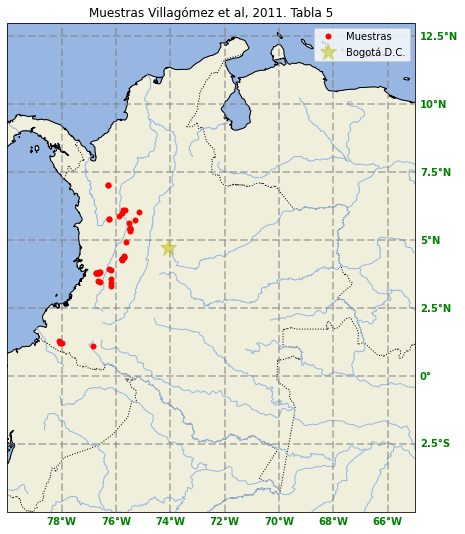

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([-65, -80, -5, 13])
#ax.set_extent([-73.8, -72.8, 6.3, 7.5])
#ax.set_extent([-73.4, -72.8, 6.35, 6.9])
#ax.set_extent([-73.2, -73.05, 6.75, 6.9])

ax.coastlines()
ax.plot(lons,lats,'r.', markersize =10, label="Muestras")

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlabel_style = {'size': 15, 'color': 'green'}
gl.ylabel_style = {'size': 10, 'color': 'green'}
gl.xlabel_style = {'color': 'green', 'weight': 'bold'}
gl.ylabel_style = {'color': 'green', 'weight': 'bold'}

bog_lon, bog_lat = -74.0721, 4.7110

ax.plot(bog_lon, bog_lat, 'y*', markersize=17, alpha=0.5, label='Bogotá D.C.')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)
ax.legend()
#coord1 = transFigure.transform(ax2.transAxes.transform([0,0]))
ax.set_title("Muestras Villagómez et al, 2011. Tabla 5")

plt.show()

## Rare Earth Diagram

In [11]:
data.columns

Index(['Samples', 'Unit', 'Lithology', 'Latitude N', 'Longitude W', 'SiO 2',
       'TiO 2', 'Al 2O 3', 'Fe 2 O3', 'MnO', 'MgO', 'CaO', 'Na 2O', 'K 2O',
       'P 2O 5', 'LOI', 'Cr 2O 3', 'NiO', 'Total', 'Cr', 'Ni', 'Cu', 'Zn',
       'Ga', 'Sc', 'V', 'Co', 'Cs', 'Ba', 'Rb', 'Th', 'Nb', 'Ta', 'Sr', 'Zr',
       'Hf', 'Y', 'Pb', 'U', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb',
       'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'],
      dtype='object')

In [12]:
ree = data.copy()[["La", "Ce", "Pr", "Nd", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu"]]

In [13]:
from pyrolite.util.synthetic import example_spider_data

normdf = example_spider_data(start="EMORB_SM89", norm_to="PM_PON")

In [14]:
type(normdf)

pandas.core.frame.DataFrame

In [15]:
normdf.columns

Index(['Cs', 'Tl', 'Rb', 'Ba', 'W', 'Th', 'U', 'Nb', 'Ta', 'K', 'La', 'Ce',
       'Pb', 'Pr', 'Mo', 'Sr', 'P', 'Nd', 'F', 'Sm', 'Zr', 'Hf', 'Eu', 'Sn',
       'Sb', 'Ti', 'Gd', 'Tb', 'Dy', 'Li', 'Y', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'],
      dtype='object')

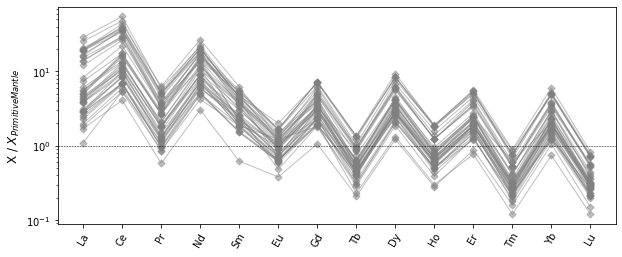

In [16]:
import pyrolite.plot
from pyrolite.geochem.ind import by_incompatibility

ax = ree.pyroplot.spider(color="0.5", alpha=0.5, unity_line=True, figsize=(10, 4))
ax.set_ylabel("X / $X_{Primitive Mantle}$")
plt.show()

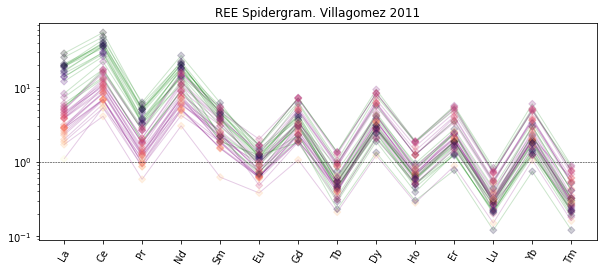

In [17]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10, 4))
ax.set_title("REE Spidergram. Villagomez 2011")
ree.pyroplot.spider(
    ax=ax,
    unity_line=True,
    index_order='incompatibility',
    scatter_kw=dict(cmap="magma_r", color=np.log(ree["La"])),
    line_kw=dict(
        color=ree["La"] > 5,
        color_mappings={"color": {True: "green", False: "purple"}},
    ),
    alpha=0.2,  # common alpha config between lines and markers
    s=25,  # argument for scatter which won't be passed to lines
)
plt.show()

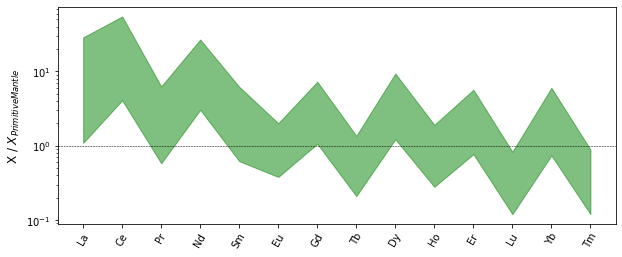

In [18]:
ax = ree.pyroplot.spider(
    mode="fill",
    color="green",
    alpha=0.5,
    unity_line=True,
    index_order='incompatibility',
    figsize=(10, 4),
)
ax.set_ylabel("X / $X_{Primitive Mantle}$")
plt.show()

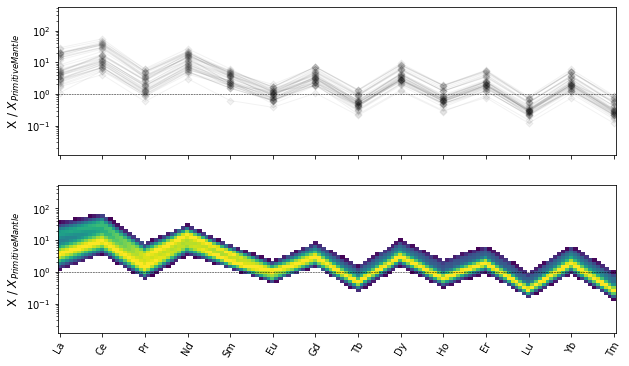

In [19]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 6))
ree.pyroplot.spider(
    ax=ax[0], color="k", alpha=0.05, unity_line=True, index_order=by_incompatibility
)
ree.pyroplot.spider(
    ax=ax[1],
    mode="binkde",
    vmin=0.05,  # 95th percentile,
    resolution=10,
    unity_line=True,
    index_order='incompatibility',
)
[a.set_ylabel("X / $X_{Primitive Mantle}$") for a in ax]
plt.show()

(0.0, 70.0)

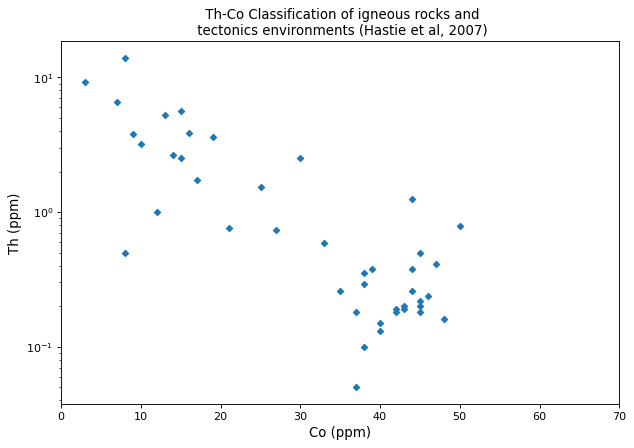

In [67]:
from matplotlib.pyplot import figure

figure(figsize=(9, 6), dpi=80)

plt.scatter(data["Co"], data["Th"])
plt.xlabel("Co (ppm)")
plt.title(" Th-Co Classification of igneous rocks and\n tectonics environments (Hastie et al, 2007)")
plt.ylabel("Th (ppm)")
plt.yscale("log")

plt.xlim(0,70)

Text(0, 0.5, 'La/Yb')

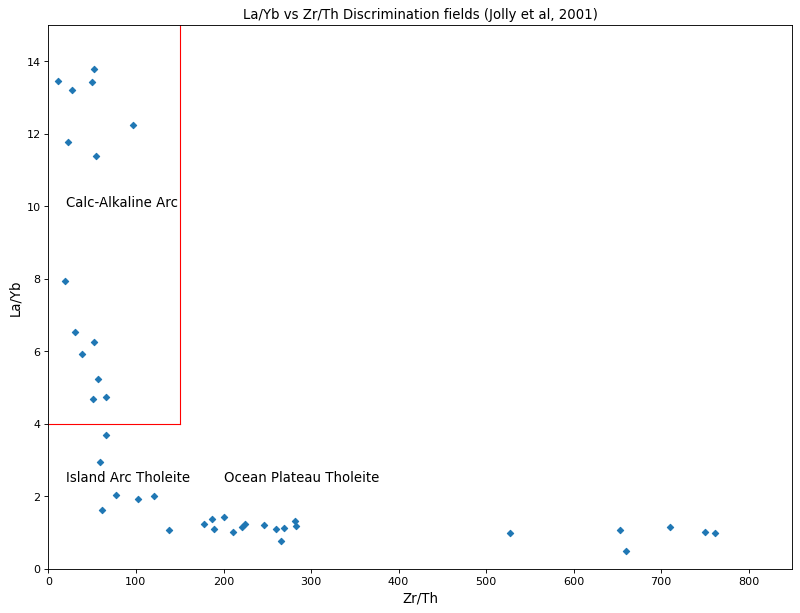

In [65]:
figure(figsize=(12, 9), dpi=80)

plt.scatter(data["Zr"]/data["Th"], data["La"]/data["Yb"])
plt.xlabel("Zr/Th")
plt.title("La/Yb vs Zr/Th Discrimination fields (Jolly et al, 2001)")

x1, y1 = [0, 150], [4, 4]
x2, y2 = [150, 150], [4, 15]

plt.plot(x1, y1, x2, y2, c="red")
plt.xlim(0,850)
plt.ylim(0,15)

plt.text(20, 10, 'Calc-Alkaline Arc', fontsize=12)
plt.text(20, 2.4, 'Island Arc Tholeite', fontsize=12)
plt.text(200, 2.4, 'Ocean Plateau Tholeite', fontsize=12)


plt.ylabel("La/Yb")


